# Проект 2. Разведывательный анализ данных¶


## Цель проекта: провести разведывательный анализ данных представленного датасетае¶


### Задачи проекта:

* провести первичную обработку
* посмотреть распределение признаков для числовых переменных и устранить выбросы
* оценить количество уникальных значений для номинативных переменных
* провести корреляционный анализ количественных переменных
* провести анализ влияния наминативных переменных на предсказываемую величину
* провести отбор признаков

### Описание датасета¶


school — аббревиатура школы, в которой учится ученик

sex — пол ученика ('F' - женский, 'M' - мужской)

age — возраст ученика (от 15 до 22)

address — тип адреса ученика ('U' - городской, 'R' - за городом)

famsize — размер семьи('LE3' <= 3, 'GT3' >3)

Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 
'other' - другое)

Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 
'other' - другое)

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

schoolsup — дополнительная образовательная поддержка (yes или no)

famsup — семейная образовательная поддержка (yes или no)

paid — дополнительные платные занятия по математике (yes или no)

activities — дополнительные внеучебные занятия (yes или no)

nursery — посещал детский сад (yes или no)

higher — хочет получить высшее образование (yes или no)

internet — наличие интернета дома (yes или no)

romantic — в романтических отношениях (yes или no)

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

absences — количество пропущенных занятий

score — баллы по госэкзамену по математике

## 1. Первичный отсмотр данных ¶


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # выводить больше строк
pd.set_option('display.max_columns', 50) # выводить больше колонок

In [249]:
# считываем исходный датасет
stud = pd.read_csv('stud_math.csv')

In [250]:
# можем проверить, успешно ли импортируются данные, сделав вывод
display(stud.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [251]:
# загружаем расширенный формат вывода для столцов, т.к. столбцы выводятся не все
# и выведем заново
pd.set_option('display.max_columns', 40)
display(stud.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [252]:
# проверим все ли столбцы из описания загрузились 
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [253]:
# Выведем кол-во колонок с пропущенными данными
df.isnull().any().sum()

27

#### Промежуточный вывод:

- загрузились 30 столбцов, а в описании 29

- всего 395 записей

- колонок с пропущенными данными 27

## 2.Первичный анализ данных в столбцах ¶


### Из описания датасета и первичного осмотра видно, что:

* числовых рядов - 3 (три): age, absences, score
* бинарных (два значения) - 12: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
* оценочные (несколько значений) - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health
* остальные (в том числе Номинальные) (их пока мы не можем отнести к какой-нибудь группе) - 2: school, studytime_granular
* проверяемых стольцов - 30 
* столбец 'studytime, granular' - отсутствует в описании

In [254]:
# посмотрим как записаны столбцы
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [255]:
# для удобства, столбцы начинающиеся с большой буквы, 
# переименуем на те, что начинаются с маленькой,
# а сложные названия в простые 
stud.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

In [256]:
# убеждаемся в правильности всей картины
display(stud.head(5))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


#### Теперь рассмотрим все 30 столбцов по отдельности

### Атрибут school¶ (аббревиатура школы, в которой учится ученик)

In [257]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


In [258]:
print(df['school'].unique())
print(df['school'].value_counts(normalize=True))
print(df['school'].isnull().sum())

['GP' 'MS']
GP    0.883544
MS    0.116456
Name: school, dtype: float64
0


In [259]:
stud.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### Промежуточный вывод по school: 

* у нас 2 названия школ. 
* больще учеников учится в школе 'GP' - 88%
* это бинарный признак. 
* пропусков нет 

### Атрибут studytime и studytime_gr, не присутствующий в описании.¶

[ -6.  -9.  -3.  nan -12.]
-6.0     0.500000
-3.0     0.265464
-9.0     0.164948
-12.0    0.069588
Name: studytime, granular, dtype: float64


7

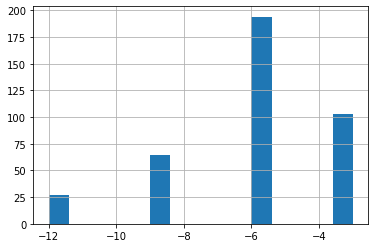

In [260]:
# определяем неизвестный столбец 'studytime, granular'

display(df['studytime, granular'].hist(bins=15))
print(df['studytime, granular'].unique())
print(df['studytime, granular'].value_counts(normalize=True))
df['studytime, granular'].isnull().sum()

In [261]:
# посмотрим визуально на несколько значений
stud.loc[:,['studytime','studytime_gr']]

,studytime,studytime_gr
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [262]:
# выводим распределение значений этих столбцов
display(pd.DataFrame(stud.studytime.value_counts()),pd.DataFrame(stud.studytime_gr.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,studytime_gr
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [263]:
# выполним проверку корреляции двух столбцов
stud['studytime'].corr(stud['studytime_gr'])

-1.0

In [264]:
# Убедились в наличии обратной корреляция между столбцами studytime и studytime_gr

In [265]:
# для дальнейшего анализа столбец studytime_gr не пригодится
# удаляем даный столбец
stud.drop(['studytime_gr'], inplace = True, axis = 1)

In [266]:
# продолжаем анализ столбца studytime
stud.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


[ 2.  3.  1. nan  4.]
2.0    0.500000
1.0    0.265464
3.0    0.164948
4.0    0.069588
Name: studytime, dtype: float64


7

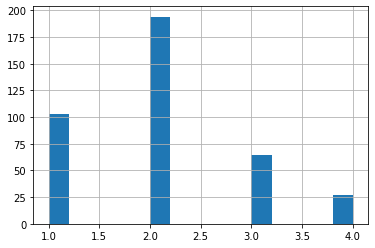

In [267]:
# (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# это время на учёбу помимо школы в неделю 

display(df['studytime'].hist(bins=15))
print(df['studytime'].unique())
print(df['studytime'].value_counts(normalize=True))
df['studytime'].isnull().sum()

In [268]:
# проверяем себя
395-388

7

#### Промежуточный вывод по studytime: 

* 4 уникальных значения (оценки). Свидетельство оценочного категориального признака.
* заполнить пропуски в данный момент невозможно. 
* 7 строк, в которых время на учёбу помимо школы в неделю неизвестно (это 1.77%).
* столбец 'studytime, granular' удален, так как он обратно скоррелирован с 'studytime'. 

### Атрибут m_edu — образование матери
 


0 - нет

1 - 4 класса

2 - 5-9 классы,
    
3 - среднее специальное или 11 классов,

4 - высшее
 

[ 4.  1.  3.  2. nan  0.]
4.0    0.334184
2.0    0.260204
3.0    0.247449
1.0    0.150510
0.0    0.007653
Name: Medu, dtype: float64


3

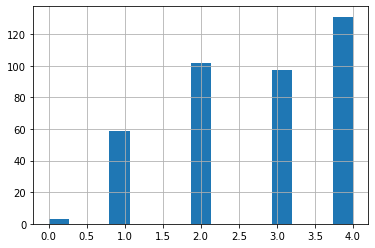

In [269]:
display(df['Medu'].hist(bins=15))
print(df['Medu'].unique())
print(df['Medu'].value_counts(normalize=True))
df['Medu'].isnull().sum()

In [270]:
pd.DataFrame(stud.m_edu.value_counts())

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [271]:
stud.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


#### Промежуточный вывод по m_edu: 

* 5 уникальных значения (оценки). Свидетельство оценочного категориального признака.
* 3 строки в которых значения неизвестны.
* заполнить пропуски в данный момент невозможно. 
* строк соответсвующих значению 0.0 статистически минимальное кол-во (==3), или меньше 1%
* наибольшее количество матерей с высшим образованием.

### Атрибут f_edu — образование отца 

0 - нет

1 - 4 класса

2 - 5-9 классы,
    
3 - среднее специальное или 11 классов,

4 - высшее

[ 4.  1.  2.  3. nan  0.]
2.0    0.285714
3.0    0.258760
4.0    0.239892
1.0    0.210243
0.0    0.005391
Name: Fedu, dtype: float64


24

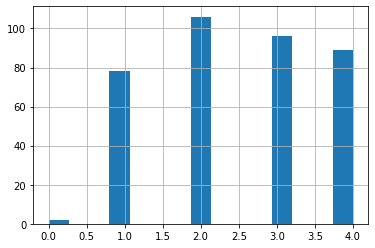

In [272]:
display(df['Fedu'].hist(bins=15))
print(df['Fedu'].unique())
print(df['Fedu'].value_counts(normalize=True))
df['Fedu'].isnull().sum()

In [273]:
# пройдемся по столбцу и уберем ноль там, где он не нужен
df['Fedu'] = df['Fedu'].apply(lambda x: x/10 if x >10 else x)

[ 4.  1.  2.  3. nan  0.]
2.0    0.285714
3.0    0.258760
4.0    0.239892
1.0    0.210243
0.0    0.005391
Name: Fedu, dtype: float64


24

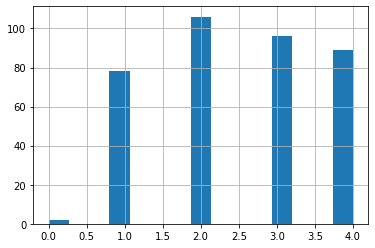

In [274]:
display(df['Fedu'].hist(bins=15))
print(df['Fedu'].unique())
print(df['Fedu'].value_counts(normalize=True))
df['Fedu'].isnull().sum()

In [275]:
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [276]:
# появилось значение отсутствующее в описании датасета 
# заменим его на 4.0
stud.loc[stud['f_edu'] == 40.0, 'f_edu'] = 4.0

In [277]:
# выполним проверку
pd.DataFrame(stud.f_edu.value_counts())

,f_edu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [278]:
stud.loc[:, ['f_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [279]:
# проверяем себя
395-371

24

#### Промежуточный вывод по f_edu: 

* 5 уникальных значения (оценки). Свидетельство оценочного категориального признака.
* 24 строки в которых значения неизвестны. строки в которых значения неизвестны.
* заполнить пропуски в данный момент невозможно. 
* строк соответсвующих значению 0.0 статистически минимальное кол-во (==2), или меньше 1%.
* в датасете был выброс (40.0), он был заменен
* Наибольшее количество отцов с образованием 5-9 классы.

### Атрибут m_job — работа матери 

* 'teacher' - учитель,

* 'health' - сфера здравоохранения,

* 'services' - гос служба,
    
* 'at_home' - не работает,

* 'other' - другое

['at_home' 'health' 'other' 'services' 'teacher' nan]
other       0.353723
services    0.260638
at_home     0.154255
teacher     0.146277
health      0.085106
Name: Mjob, dtype: float64


19

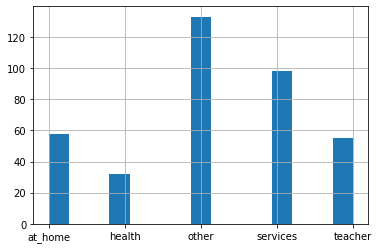

In [280]:
display(df['Mjob'].hist(bins=15))
print(df['Mjob'].unique())
print(df['Mjob'].value_counts(normalize=True))
df['Mjob'].isnull().sum()

In [281]:
pd.DataFrame(stud.m_job.value_counts())

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


In [282]:
stud.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [283]:
# проверяем себя
395-376

19

#### Промежуточный вывод по m_job: 

* 5 уникальных значения (оценки). Свидетельство оценочного категориального признака.
* 19 строк в которых значения неизвестны. строки в которых значения неизвестны.
* заполнить пропуски в данный момент невозможно. 
* самый высокий бал наблюдается у детей, чьи матери работают в сфере медицины.
* наибольшее количество матерей работает (помимо варианта "другое") на гос. службе.


### Атрибут f_job — работа отца

* 'teacher' - учитель,

* 'health' - сфера здравоохранения,

* 'services' - гос служба,
    
* 'at_home' - не работает,

* 'other' - другое

['teacher' 'other' nan 'health' 'services' 'at_home']
other       0.548747
services    0.284123
teacher     0.080780
at_home     0.044568
health      0.041783
Name: Fjob, dtype: float64


36

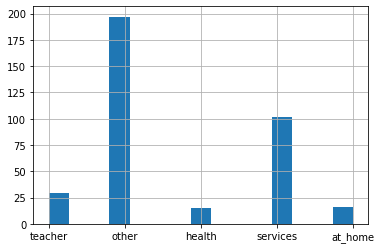

In [284]:
display(df['Fjob'].hist(bins=15))
print(df['Fjob'].unique())
print(df['Fjob'].value_counts(normalize=True))
df['Fjob'].isnull().sum()

In [285]:
pd.DataFrame(stud.f_job.value_counts())

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


In [286]:
stud.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [287]:
# проверяем себя
395-359

36

#### Промежуточный вывод по f_job: 

* 5 уникальных значения (оценки). Свидетельство оценочного категориального признака.
* 36 строк в которых значения неизвестны (9.1% от всех строк).
* заполнить пропуски в данный момент невозможно. 
* наибольшее количество отцов работает (помимо варианта "другое") на гос. службе.

### Атрибут reason 

* 'home' - близость к дому

* 'reputation' - репутация школы

* 'course' - образовательная программа

* 'other' - другое

['course' 'other' 'home' 'reputation' nan]
course        0.362434
home          0.275132
reputation    0.272487
other         0.089947
Name: reason, dtype: float64


17

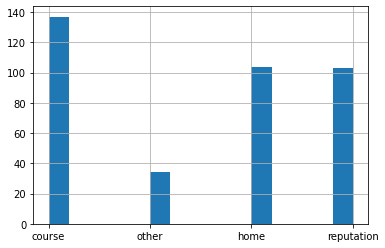

In [288]:
display(df['reason'].hist(bins=15))
print(df['reason'].unique())
print(df['reason'].value_counts(normalize=True))
df['reason'].isnull().sum()

In [289]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [290]:
stud.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [291]:
# проверяем себя
395-378

17

#### Промежуточный вывод по reason:


* количесто уникальных данных - 4 шт
* пустые значения - 17 шт. Доля пропусков от объёма выборки: 4.4%
* засоренность данных - отсутсвует
* наибольшее количество причин выбора школы связаны с образовательной программой.

### Атрибут guardian

* 'mother' - мать,

* 'father' - отец,

* 'other' - другое

['mother' 'father' 'other' nan]
mother    0.686813
father    0.236264
other     0.076923
Name: guardian, dtype: float64


31

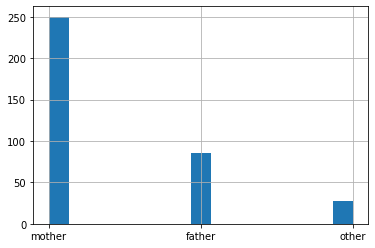

In [292]:
display(df['guardian'].hist(bins=15))
print(df['guardian'].unique())
print(df['guardian'].value_counts(normalize=True))
df['guardian'].isnull().sum()

In [293]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [294]:
stud.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [295]:
# проверяем себя
395-364

31

#### Промежуточный вывод по guardian:


* количесто уникальных данных - 3 шт
* пустые значения - 31 шт. Доля пропусков от объёма выборки: 8.6%
* наибольшее количество опекунов - матери 70% 
* Вместо "mother"-"father": "parent". Размер выборки "other" в районе 30


### Атрибут traveltime¶

1 - <15 мин.,

2 - 15-30 мин.,

3 - 30-60 мин.,

4 - >60 мин.


[ 2.  1.  3. nan  4.]
1.0    0.659401
2.0    0.261580
3.0    0.059946
4.0    0.019074
Name: traveltime, dtype: float64


28

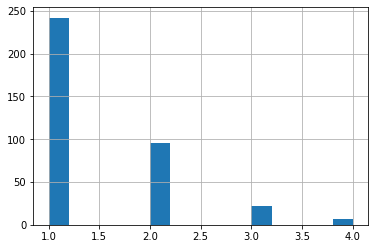

In [296]:
display(df['traveltime'].hist(bins=15))
print(df['traveltime'].unique())
print(df['traveltime'].value_counts(normalize=True))
df['traveltime'].isnull().sum()

In [297]:
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [298]:
stud.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [299]:
# проверяем себя
395-367

28

#### Промежуточный вывод по traveltime:

* количесто уникальных данных - 4 шт
* пустые значения - 28 шт. Доля пропусков от объёма выборки: 8%
* наибольшая часть студентов (65%) добирается до школы до 15 минут. 

### Атрибут failures 

[ 0.  3. nan  2.  1.]
0.0    0.785523
1.0    0.131367
2.0    0.042895
3.0    0.040214
Name: failures, dtype: float64


22

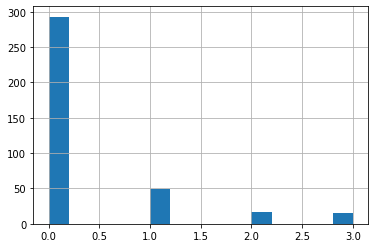

In [300]:
display(df['failures'].hist(bins=15))
print(df['failures'].unique())
print(df['failures'].value_counts(normalize=True))
df['failures'].isnull().sum()

In [301]:
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


In [302]:
# уникальные значения соответствуют по кол-ву (четыре), но не соответсвуют значениям в описании 
# (n, если 1<=n<3, иначе 4) - в описании значения должны быть от 1 до 4
# и можно было бы привести их в соответствие с описанием

# stud.loc[stud['failures'] == 3.0, 'failures'] = 4.0
# stud.loc[stud['failures'] == 2.0, 'failures'] = 3.0
# stud.loc[stud['failures'] == 1.0, 'failures'] = 2.0
# stud.loc[stud['failures'] == 0.0, 'failures'] = 1.0

# но этот код закомментирован, потому что видимо в описании закралась ошибка
# потому что следуя здравому смыслу вариант без неудач (== 0) должен быть (даже если быть полным пессимистом :)

# значит оставляем так как есть и считаем,
# что максимального значения указанного в описании 4 - не встречаетя в выборке 

# и продолжаем
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [303]:
# проверяем себя
395-373

22

In [304]:
# 22 строки в которых значения неизвестны. 
# Я бы и тут не заполнял, но уже 10 критерий анализирую и не заполнил ни одного пропуска.
# решил попробовать заполнить пропуски нулями (==0.0) потому что с натяжкой, 
# но можно выделить это одно значение из четырех, которое однозначно доминирует.

# но давайте сначала посмотрим на эти 22 строки, чтобы там не было ничего экстраордиарного
temp = stud[stud.failures.isnull()]
temp

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,NaN,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
108,GP,M,15,R,GT3,NaN,4.0,4.0,other,other,home,father,4.0,4.0,NaN,no,yes,yes,yes,yes,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,0.0,60.0


In [305]:
# ничего криминального визуально не видно
# внимание привлекли две строчки с нулевыми скорами (index: 153,170)
# это два парня 19 и 16 лет соответсвенно, живущие в городе ничем особенно не отличающие, 
# только вот опекун у одного (father) и отношения в семье немного выбиваются из общей статистики

# посмотрим на среднее значение нашей выборки из датасета и всего датасета 
# чтобы убедиться что он не экстраординарный
temp.describe()[1:2]

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
mean,16.272727,3.045455,2.684211,1.55,1.904762,NaN,4.227273,3.238095,3.181818,3.5,6.318182,57.045455


In [306]:

stud.describe()[1:2]

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
mean,16.696203,2.75,2.51752,1.438692,2.03866,0.337802,3.9375,3.231771,3.105943,3.531579,7.279373,52.262211


In [307]:
# видно что отличия несущественные

# автозаполнение нулями приведет к среднему значению пустых строк равному 0.0
# при том что среднее значение по всему датасету 0.33 - значит этот шаг оправдан 
# !!! внимание !!! еще желательно было бы сравнить медиану, 
# но я посчитал, что это избыточно на этом этапе

# для полного успокоения сгруппируем данные для score и failures,
# чтобы понимать какие значения  failures характерны нулевым значениям score
pd.set_option('display.max_columns', 60)
display(pd.DataFrame(stud.groupby(['score','failures']).age.count()).T)

score    0.0               20.0  25.0              30.0  35.0               \
failures   0.0 1.0 2.0 3.0   2.0   0.0 1.0 2.0 3.0   0.0   0.0 1.0 2.0 3.0   
age         17  10   4   4     1     3   2   1   1    15     3   2   1   3   

score    40.0              45.0              50.0              55.0       \
failures   0.0 1.0 2.0 3.0   0.0 1.0 2.0 3.0   0.0 1.0 2.0 3.0   0.0 1.0   
age         15  10   2   1    20   2   3   1    41   6   1   4    41   3   

score    60.0      65.0          70.0      75.0      80.0  85.0  90.0       \
failures   0.0 1.0   0.0 1.0 2.0   0.0 1.0   0.0 2.0   0.0   0.0   0.0 1.0   
age         24   6    21   5   1    25   1    30   1    14     6     9   1   

score    95.0  100.0  
failures   0.0   0.0  
age          5     1

In [308]:
# посмотрите какая интересная картина получается:
# при значениях score больше либо равно 70 в большинстве строк всего нет неудач failure = 0.0
# при значениях score больше 55 значения failure = 2.0 и 3.0 не встречаются
# при значениях score больше 35 кол-во неудач (1,2,3) меньше чем failure = 0.0
# при значениях score до 35 включительно кол-во неудач (1,2,3) больше чем failure = 0.0 
# при значениях score равным 0 кол-во неудач превышает кол-во ненеудач
# из этого следует, что вышеописанным парням скорее всего не светит failure = 0.0 

# в целом есть некоторая закономерность которая может звучать так
# чем меньше неудач тем больше score
# посмотрим какая статистика для возраста age=19 так как парень такой один
pd.DataFrame(stud[stud['age']==19].groupby(['score','failures']).age.count()).T

score    0.0      40.0     45.0         50.0 55.0     60.0 65.0        
failures  0.0 1.0  0.0 1.0  0.0 2.0 3.0  1.0  0.0 1.0  1.0  0.0 1.0 2.0
age         1   3    1   2    1   1   1    1    1   2    1    1   2   1

In [309]:
# в целом тенденция такая же как я писал выше 
# чем меньше неудач тем больше score

# также примечательно что тут максимальный score 65 
# поэтому можно сформулировать принцип по заполнению пропусков такой
# при значениях score от нуля до 35 включительно одна неудача failure = 1.0
# при значениях score выше 35 нет неудач failure = 0.0
# посмотрим сколько у нас таких вариантов
print(f"кол-во строк со score больше 35 := {len(temp[temp.score>35])}")
print(f"кол-во строк со score меньше 35 := {len(temp[temp.score<=35])}")

кол-во строк со score больше 35 := 20
кол-во строк со score меньше 35 := 2


In [310]:
# значит 20 значений из 22 заполним нулями, а 2 значения - 1.0

# делаем заполнение 20 значений
stud.loc[(stud['score'] > 35.0) & (stud.failures.isnull()) , 'failures'] = 0.0
# потом заполняем оставшиеся 
stud.loc[stud.failures.isnull(), 'failures'] = 1.0

In [311]:
# проверяем
print(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()

     failures
0.0       313
1.0        51
2.0        16
3.0        15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


#### Промежуточный вывод по failures:

* количесто уникальных данных - 4 шт
* Пропусков нет
* внеучебные неудачи начинаются после 19 лет.

### Атрибут famrel 

[ 4.  5.  3. nan  1.  2.]
4.0    0.494565
5.0    0.269022
3.0    0.168478
2.0    0.046196
1.0    0.021739
Name: famrel, dtype: float64


27

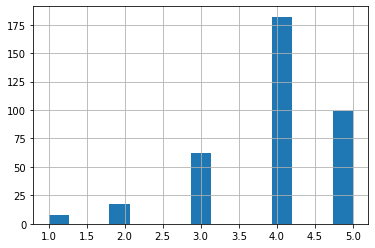

In [312]:
display(df['famrel'].hist(bins=15))
print(df['famrel'].unique())
print(df['famrel'].value_counts(normalize=True))
df['famrel'].isnull().sum()

In [313]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [314]:
# видим что появилось одно!!! значение отсутствующее в исходном описании области значений критерия 
# при этом оно по написанию очень похоже на 1.0
# скорее это ошибка ("челевеческий фактор") при внесении информации
# поэтому заменим его на 1.0
stud.loc[stud['famrel'] == -1.0, 'famrel'] = 1.0

In [315]:
# проверим
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


In [316]:
stud.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [317]:
# проверяем себя
395-368

27

#### Промежуточный вывод по famrel:

* количесто уникальных данных - 5 шт
* пустые значения - 27 шт. Доля пропусков от объёма выборки: 8%
* чаще всего встречается оценка 4 и выше в семьях где родители живут вместе


### Атрибут freetime 

[ 3.  2.  4.  1.  5. nan]
3.0    0.398438
4.0    0.291667
2.0    0.164062
5.0    0.098958
1.0    0.046875
Name: freetime, dtype: float64


11

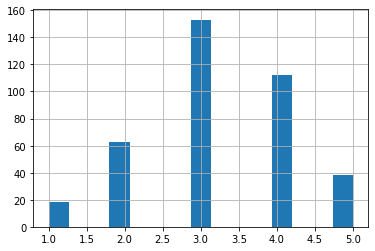

In [318]:
display(df['freetime'].hist(bins=15))
print(df['freetime'].unique())
print(df['freetime'].value_counts(normalize=True))
df['freetime'].isnull().sum()

In [319]:
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [320]:
stud.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [321]:
# проверяем себя
395-384

11

#### Промежуточный вывод по freetime:

* количесто уникальных данных - 5 шт
* пустые значения - 11 шт. Доля пропусков от объёма выборки:2.3%
* в большинстве случаев у учеников имеется "не мало" свободного времени после школы


### Атрибут goout 


[ 4.  3.  2.  1.  5. nan]
3.0    0.328165
2.0    0.260982
4.0    0.217054
5.0    0.134367
1.0    0.059432
Name: goout, dtype: float64


8

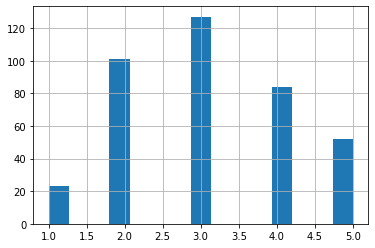

In [322]:
display(df['goout'].hist(bins=15))
print(df['goout'].unique())
print(df['goout'].value_counts(normalize=True))
df['goout'].isnull().sum()

In [323]:
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [324]:
stud.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [325]:
# проверяем себя
395-387

8

#### Промежуточный вывод по freetime:

* количесто уникальных данных - 5 шт
* пустые значения - 8 шт. Доля пропусков от объёма выборки:1.8%
* в большинстве случаев у учеников имеется "мало" времени с друзьями

### Атрибут health 

[ 3.  5.  1.  2.  4. nan]
5.0    0.363158
3.0    0.234211
4.0    0.165789
1.0    0.123684
2.0    0.113158
Name: health, dtype: float64


15

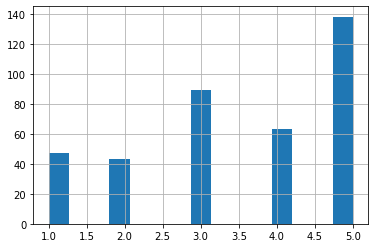

In [326]:
display(df['health'].hist(bins=15))
print(df['health'].unique())
print(df['health'].value_counts(normalize=True))
df['health'].isnull().sum()

In [327]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [328]:
stud.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [329]:
# проверяем себя
395-380

15

### Промежуточный вывод по health:

* количесто уникальных данных - 5 шт
* пустые значения - 15 шт. Доля пропусков от объёма выборки:1.8%
* большинство учеников имеют хорошее здоровые

### Атрибуте age 

[18 17 15 16 19 22 20 21]
16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64
0


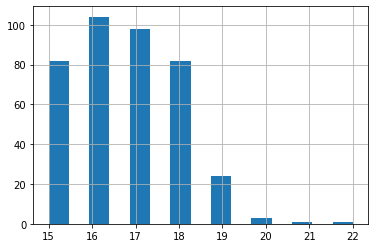

In [330]:
print(df['age'].unique())
print(df['age'].value_counts(normalize=True))
df['age'].hist(bins=15)
print(df['age'].isnull().sum())

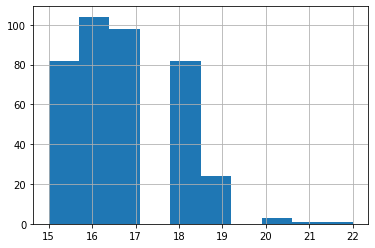

In [331]:
stud.age.hist()

In [332]:
# убедимся в отсутствии пропусков
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

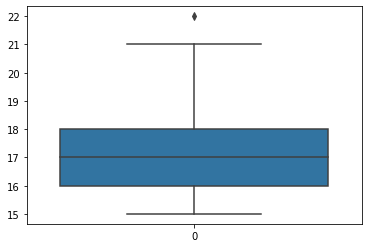

In [333]:
# построим ящик с усами чтобы проверить на наличие выбросов
sns.boxplot(data=stud.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


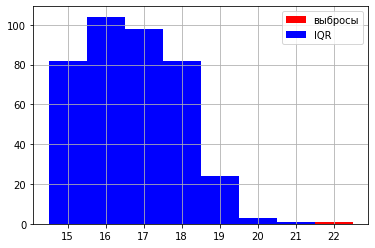

In [334]:
# видно что boxplot предлагает выкинуть выброс на 22 и граница на 21
# проводим подровный анализ границ и расчет их точных значений
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.age.loc[stud.age <= 22].hist(bins = 8, 
                                  range = (14.5, 22.5), 
                                  color = 'red',
                                  label = 'выбросы')

stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8, 
                                                                        range = (14.5, 22.5),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

- граница действительно на 21.0
- значение выброса 22 входит в допустимый диапазон 
- распределение логнормальное, характеризуется наличием длинного хвоста справа

In [335]:
# логарифмирование и проверка распределения на логнормальность
stud_age_ln = stud.age.apply(lambda x: math.log(x))

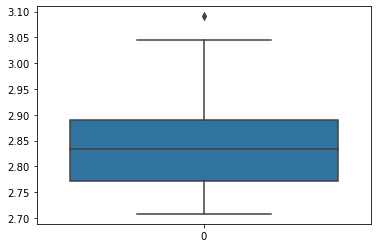

In [336]:
sns.boxplot(data=stud_age_ln)

In [337]:
# имеем не типичный случай - удаляем значение 22
stud.loc[stud['age'] == 22.0, 'age'] = np.nan

In [338]:
stud.age.describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

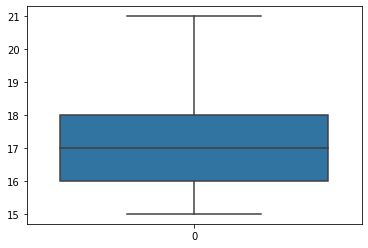

In [339]:
# проверка на наличие выбросов
sns.boxplot(data=stud.age)

### Промежуточный вывод по age:

* имеем 1 выброс данных.
* пустые значения - отсутствует

In [340]:
display(pd.DataFrame(stud.groupby(['age']).score.agg(['count','mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15.0,82,56.280488,95.0,0.0,55.0
16.0,103,55.194175,100.0,0.0,55.0
17.0,98,51.377551,90.0,0.0,55.0
18.0,80,48.312500,95.0,0.0,50.0
19.0,21,40.238095,65.0,0.0,45.0
20.0,3,70.000000,90.0,45.0,75.0
21.0,1,35.000000,35.0,35.0,35.0


### Дополнение  к age:

* чем старше тем ниже score верный возраст 20 выбивается из статистики за счет двух учеников (один с оценкой 90, другой с оценкой 75). Статистически не значимо.

### Атрибут absences

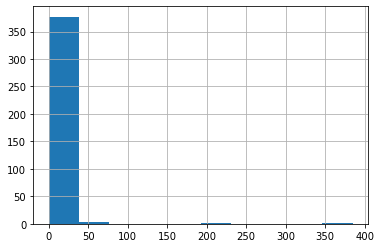

In [341]:
stud.absences.hist()

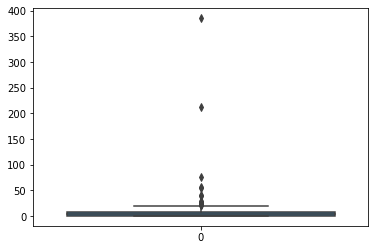

In [342]:
# проверить на наличие выбросов
sns.boxplot(data=stud.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


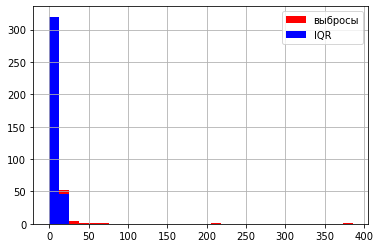

In [343]:
# сделаем подровный анализ границ и расчитаем их точные значения
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.absences.loc[stud.absences <= 385].hist(bins = 30, 
                                  range = (-1, 386), 
                                  color = 'red',
                                  label = 'выбросы')

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (-1, 386),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [344]:
# распределение логнормальное
# проверим, добавив к распределению небольшое смещение epsilon 
epsilon = 0.001
# можно применить логарифмирование и проверить распределение на логнормальность
stud_absences_ln = stud.absences.apply(lambda x: math.log(x+epsilon))

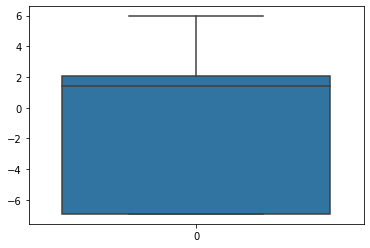

In [345]:
# проверить на наличие выбросов
sns.boxplot(data=stud_absences_ln)

In [346]:
# выбросов нет 
stud.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [347]:
# проверяем себя
395-383

12

In [348]:
# рассмотрим данные пропуски
temp = stud[stud.absences.isnull()]
temp

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15.0,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16.0,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15.0,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16.0,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18.0,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17.0,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17.0,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17.0,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17.0,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18.0,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


* допускаем, что кол-во пропусков может быть следствием критериев 'famrel', 'freetime', 'goout', 'health'

In [349]:
# сгрупируем данные, пропущенных значений по этим критериям
absences = pd.cut(stud['absences'], [-1,0, 2,4,6,8, 12, 20, 50,100])
stud.pivot_table(['health', 'famrel', 'goout', 'freetime'], absences, aggfunc=['count','mean'])

count                            mean                              
          famrel freetime goout health    famrel  freetime     goout    health
absences                                                                      
(-1, 0]      100      108   110    106  4.100000  3.240741  2.890909  3.622642
(0, 2]        59       63    61     60  3.898305  3.158730  2.885246  3.716667
(2, 4]        60       60    57     59  3.950000  3.200000  3.368421  3.322034
(4, 6]        34       35    36     34  3.794118  3.171429  3.472222  3.500000
(6, 8]        27       26    27     26  4.074074  3.230769  2.925926  3.461538
(8, 12]       30       33    34     32  3.933333  3.393939  3.000000  3.531250
(12, 20]      30       32    33     34  3.700000  3.562500  3.454545  3.588235
(20, 50]      12       11    12     12  3.750000  2.454545  3.333333  3.000000
(50, 100]      2        2     3      3  4.500000  2.000000  2.333333  3.666667

In [350]:
# оставим эти значения без заполнения

### Промежуточный вывод по absences:

* распределение признака логнормальное (то есть имеет длинный хвост справа)
* несколько выбросов - кто-то отсутствовал на всех занятиях
* колонка содержит пустые значения - 12 шт.
* большинство пропусков находятся в пределах от 0 до 8

### Атрибут score 

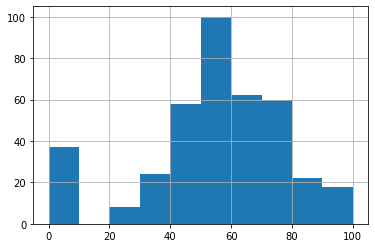

In [351]:
stud.score.hist()

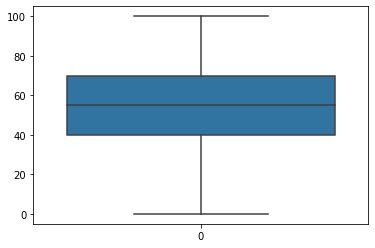

In [352]:
# построим ящик с усами чтобы проверить на наличие выбросов
sns.boxplot(data=stud.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


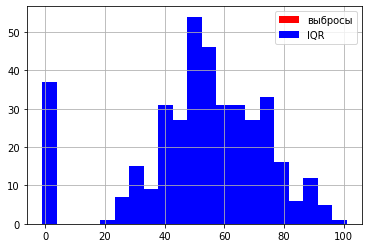

In [353]:
# выполним анализ границ и расчет их точных значений
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.score.loc[stud.score <= 101].hist(bins = 21, 
                                  range = (-1, 101), 
                                  color = 'red',
                                  label = 'выбросы')

stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, 
                                                                        range = (-1, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [354]:
stud.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [355]:
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [356]:
# посмотрим на распределение без нуля
stud_score_bli_0 = stud.score.apply(lambda x: x if x>0 else np.nan)

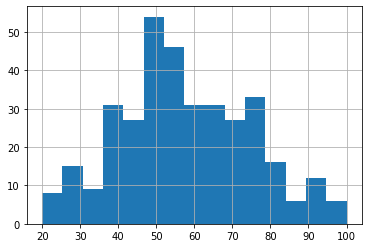

In [357]:
stud_score_bli_0.hist(bins = 15)

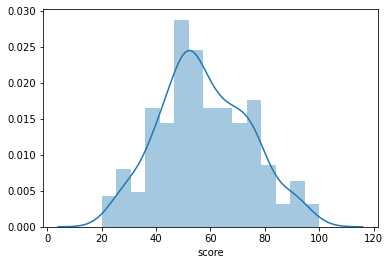

In [358]:
sns.distplot(stud_score_bli_0, bins = 15)

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


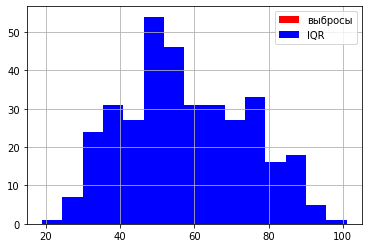

In [359]:
# сделаем подровный анализ границ и расчитаем их точные значения
median = stud_score_bli_0.median()
IQR = stud_score_bli_0.quantile(0.75) - stud_score_bli_0.quantile(0.25)
perc25 = stud_score_bli_0.quantile(0.25)
perc75 = stud_score_bli_0.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud_score_bli_0.loc[stud_score_bli_0 <= 101].hist(bins = 15, 
                                  range = (19, 101), 
                                  color = 'red',
                                  label = 'выбросы')

stud_score_bli_0.loc[stud_score_bli_0.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 15, 
                                                                        range = (19, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [360]:
stud['no_score'] = stud.score.apply(lambda x: None if pd.isnull(x) else 1 if x==0 else 0)

In [361]:
# проверим
display(stud.head())
stud['no_score'].value_counts()

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,no_score
0,GP,F,18.0,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,0.0
1,GP,F,17.0,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,0.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,0.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,0.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,0.0


0.0    352
1.0     37
Name: no_score, dtype: int64

In [362]:
# удаляем нули
stud.loc[stud['score'] == 0.0, 'score'] = np.nan

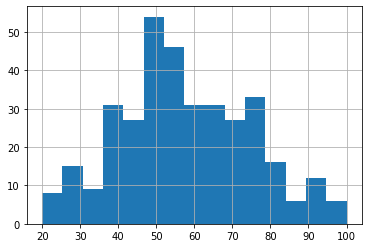

In [363]:
# проверяем
stud.score.hist(bins=15)

### Промежуточный вывод по score:

* распределение признака нормальное, с большой дисперсией 
* выбросов нет (удалили значение 0.0)
* добавили новый булевый критерий - no_score, соответствующий значению 0.0)
* медиана немного смещена влево
* пропусков - 43 шт.(до добавления признака пропусков было 6)

### Дополнение по no_score:

* признак булевый числовой
* Пропусков - 6 шт.

###  Рассмотрим "бинарные" категориальные признаки:

In [364]:
replacement_list = []
list_of_binary_columns = ['sex', 'address', 'famsize', 'p_status', 
                   'schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic']

In [365]:
for elem in list_of_binary_columns:
    a = stud[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0],a[1]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: stud[elem].values")
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [366]:
replacement_list[5] = ['yes', 'no']
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [367]:
# ошибок в написании возможных вариантов значений нет
replacement_list[5] = ['yes', 'no']
replacement_list[6] = ['yes', 'no']
replacement_list[7] = ['yes', 'no']
replacement_list[11] = ['yes', 'no']

In [368]:
# проверяем
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no']]

In [369]:
# произведем замену
for i in range(len(list_of_binary_columns)):
    elem = list_of_binary_columns[i]
    stud.loc[stud[elem] == replacement_list[i][0], elem] = 1.0
    stud.loc[stud[elem] == replacement_list[i][1], elem] = 0.0

In [370]:
# выполняем проверку
replacement_list =[]
for elem in list_of_binary_columns:
    a = stud[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0],a[1]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: stud[elem].values")
replacement_list

[[1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0]]

In [371]:
# продолжаем анализ бинарных критериев
stud[list_of_binary_columns].describe()

,sex,address,famsize,p_status,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395.0,378.0,368.0,350.0,386.0,356.0,355.0,381.0,379.0,375.0,361.0,364.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
freq,208.0,295.0,261.0,314.0,335.0,219.0,200.0,195.0,300.0,356.0,305.0,240.0


In [372]:
temp = stud[list_of_binary_columns].describe()

In [373]:
# расчитаем кол-во пропущенных значений по бинарным критериям
395-temp.T['count']

sex            0.0
address       17.0
famsize       27.0
p_status      45.0
schoolsup      9.0
famsup        39.0
paid          40.0
activities    14.0
nursery       16.0
higher        20.0
internet      34.0
romantic      31.0
Name: count, dtype: float64

In [374]:
# для критериев с пропусками больше 10,
# выведем частоту встречаемости значений
stud.pivot_table(['address','famsize', 'p_status', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic'], 'sex', aggfunc=['count'])

count                                                               \
    activities address famsize famsup higher internet nursery p_status paid   
sex                                                                           
0.0        179     178     171    174    172      167     179      166  166   
1.0        202     200     197    182    203      194     200      184  189   

              
    romantic  
sex           
0.0      169  
1.0      195

### Промежуточный вывод по бинарным критериям:

* критерии приведены к численным значениям и готовы к загрузкам в модель
* выбросов нет (удалили значение 0.0)
* больше всего пропусков в критерии Pstatus 45

## 3. Корреляционный анализ

1. Выясним, какие столбцы коррелируют с score

2. Корреляции рассмотрим только для числовых столбцов

In [375]:
stud_num = stud[['age', 'absences', 'score']]

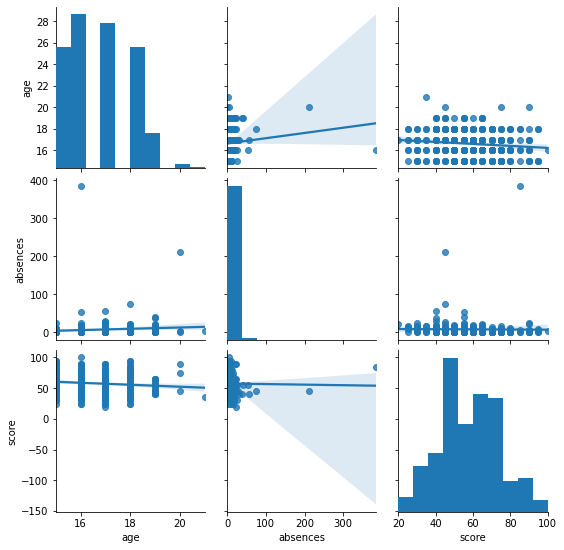

In [376]:
sns.pairplot(stud_num, kind = 'reg')

In [377]:
# для наглядности спользуем матрицу корреляций:
stud_num.corr()

,age,absences,score
age,1.000000,0.091656,-0.121579
absences,0.091656,1.000000,-0.014039
score,-0.121579,-0.014039,1.000000


### между возрастом есть обратная корреляция. Чем выше age, тем ниже score

### Анализ категориальных переменных¶


### переменные:

- бинарных (два значения) - 13: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school 
- оценочных (несколько значений) - 13: Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

In [378]:
# в list_of_binary_columns добавим school
list_of_binary_columns.append('school')
list_of_rating_columns = ('m_edu', 'f_edu', 'm_job', 'f_job',
                            'reason', 'guardian', 'traveltime', 'studytime',
                            'failures', 'famrel', 'freetime', 'goout', 'health')
list_of_all_columns=[]
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)

### Анализ "бинарных" категориальных переменных¶

In [379]:
# функция для бинарных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 3))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

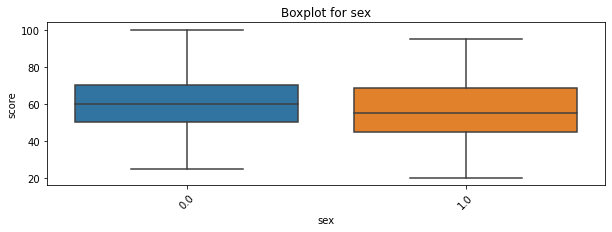

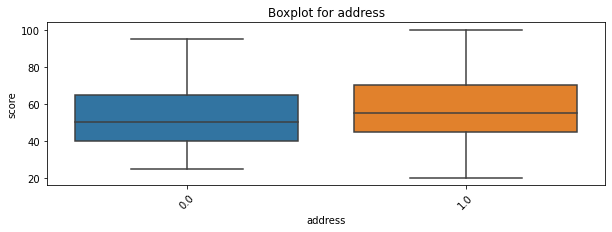

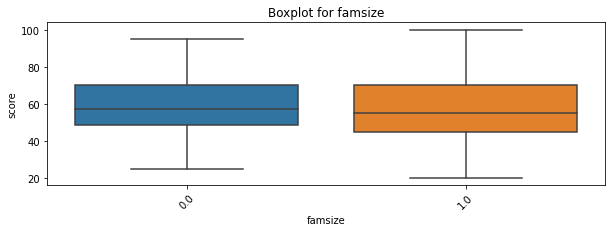

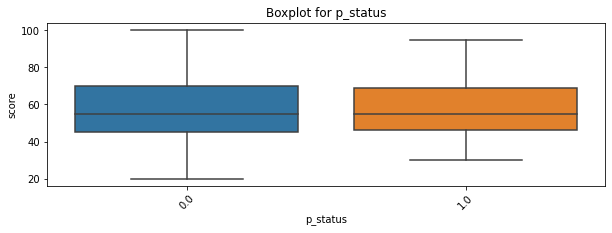

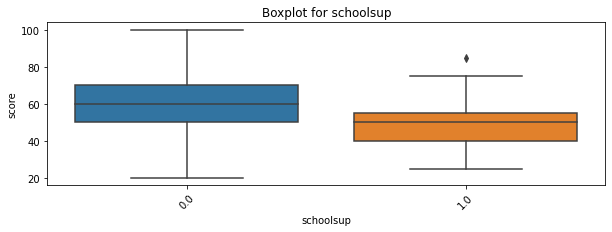

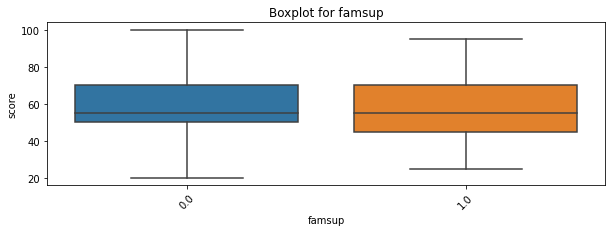

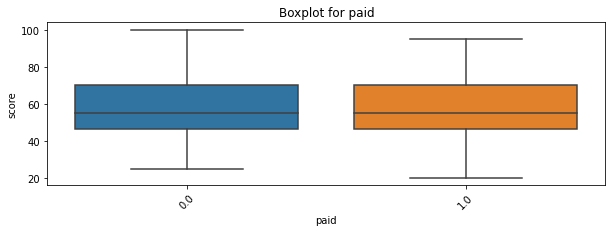

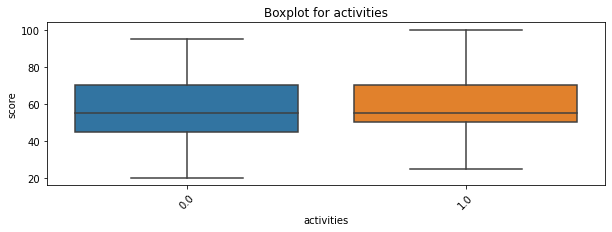

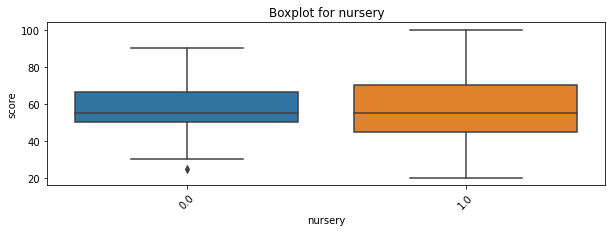

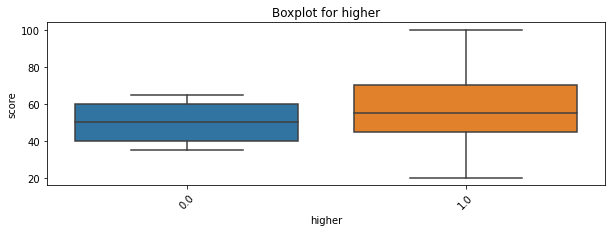

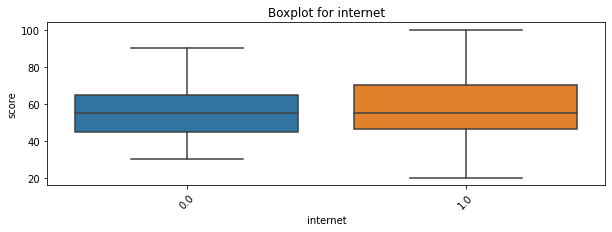

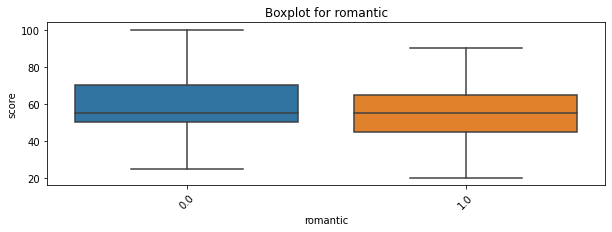

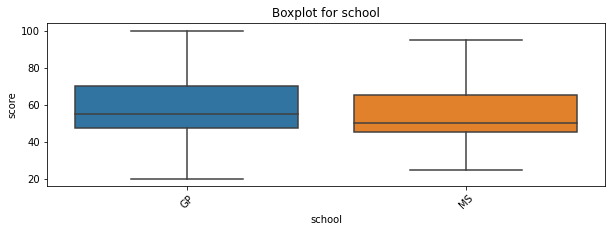

In [380]:
# сначала сделаем box plot на бинарных
for col in list_of_binary_columns:
    get_boxplot(col)

### Анализ "оценочных" категориальных переменных¶

In [381]:
# функция для оценочных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

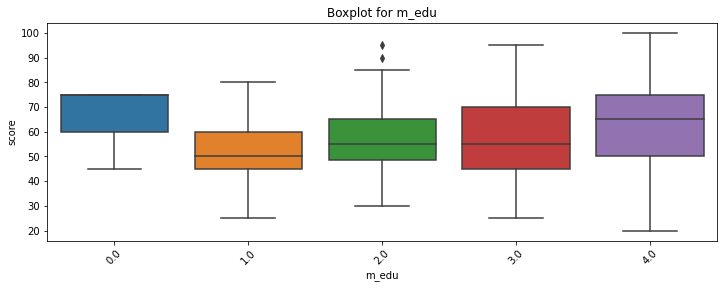

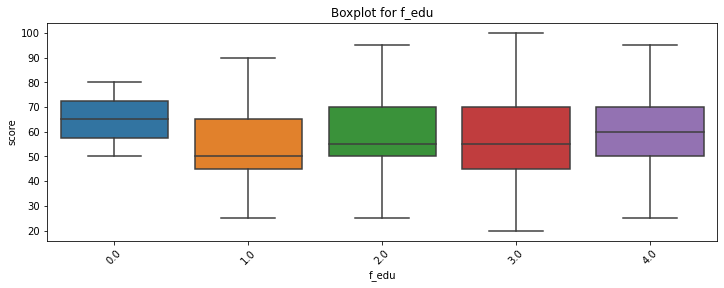

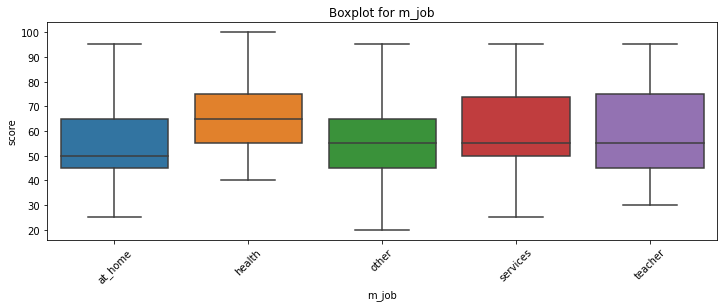

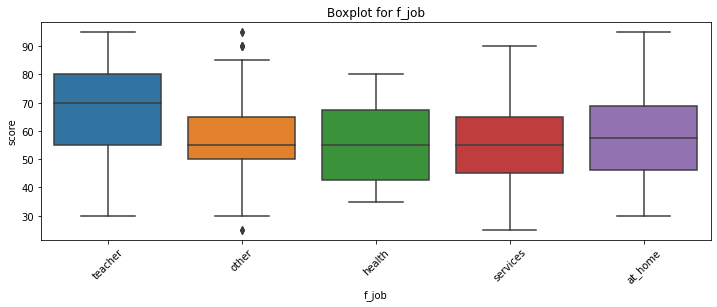

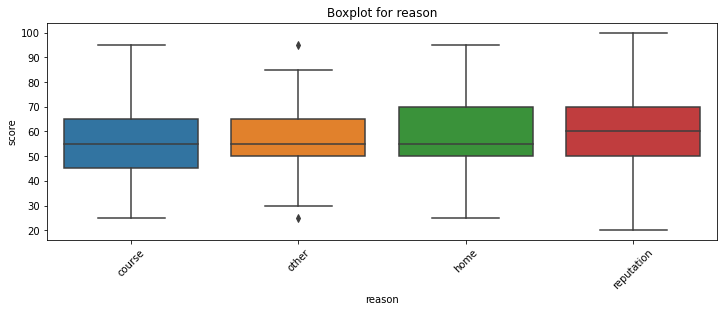

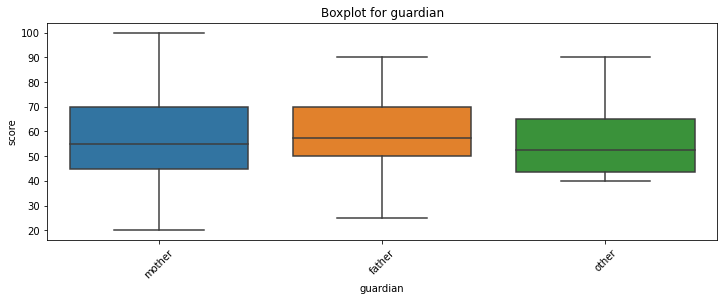

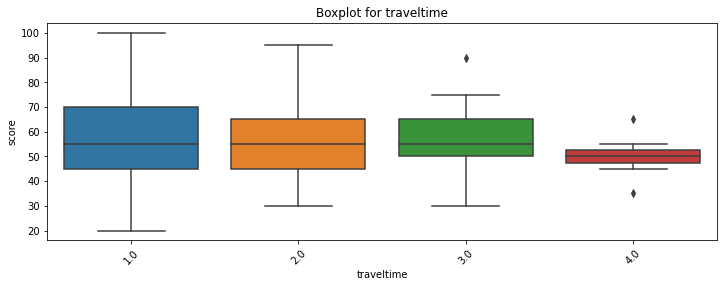

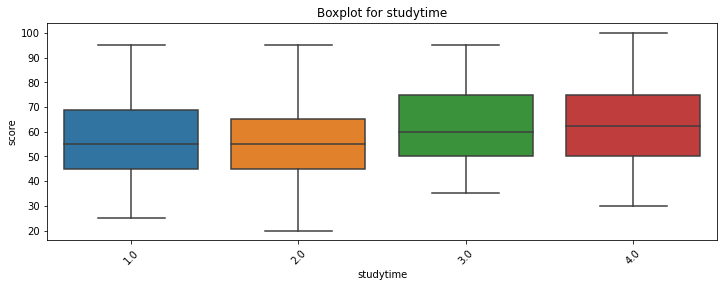

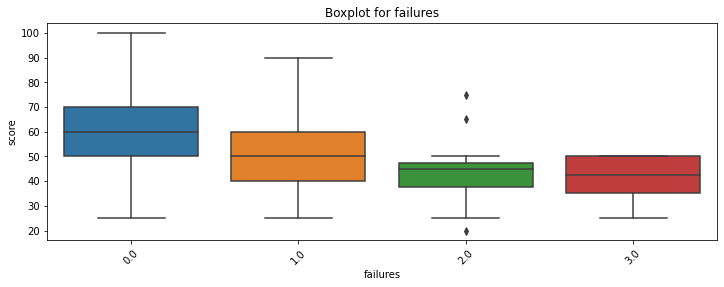

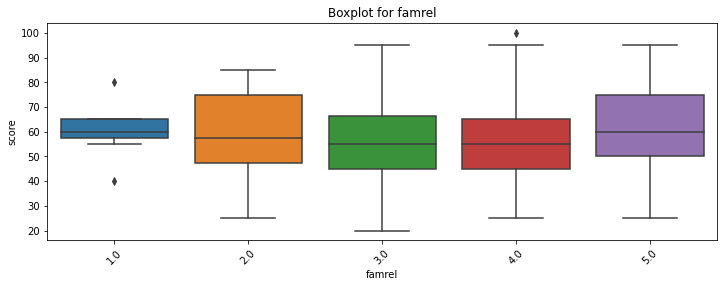

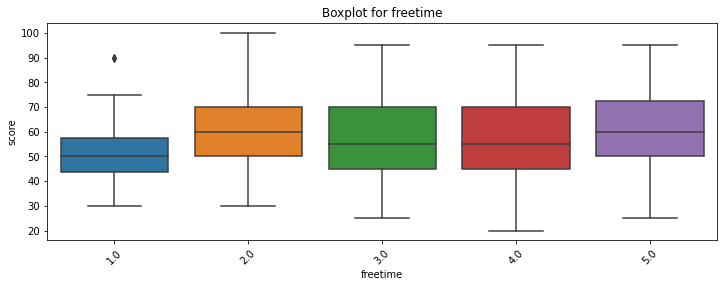

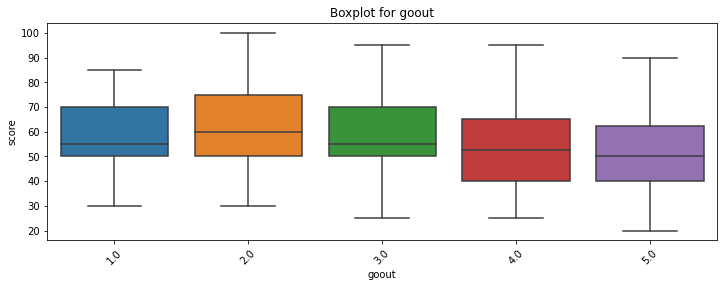

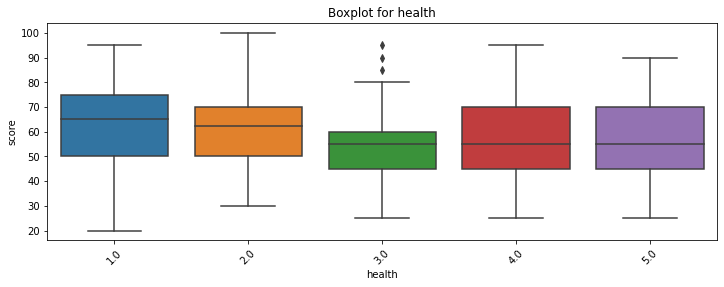

In [382]:
# сначала сделаем box plot на бинарных
for col in list_of_rating_columns:
    get_boxplot(col)

### Тест Стьюдента по всем категориальным признакам¶


In [383]:
# с помощью теста Стьюдента, проверим, есть ли 
# статистическая разница в распределении оценок по всем категориальным признакам, 
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                          stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue
#         print(f"для столбца {column} ttest:= {ttest}")
#         print(f"                     comb:= {combinations_all}")
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [384]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки schoolsup
!!!Найдены статистически значимые различия для колонки m_edu
!!!Найдены статистически значимые различия для колонки f_edu
!!!Найдены статистически значимые различия для колонки m_job
!!!Найдены статистически значимые различия для колонки f_job
!!!Найдены статистически значимые различия для колонки studytime
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки goout


Резюме - тест Стьюдента (score): достаточно отличаются 9 параметров: address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout. Оставим эти переменные в датасете для дальнейшего построения модели.

Вспоминаем о новой переменной no_score. Видно, что метод с тестом Стьюдента более четкий, поэтому строить бокс плоты для этого нового критерия не будем, сразу построим новую фукцию и проведем тест Стьюдента

In [385]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'no_score'].dropna(),
                          stud.loc[stud.loc[:, column] == comb[1], 'no_score'].dropna()).pvalue
#         print(f"для столбца {column} ttest:= {ttest}")
#         print(f"                     comb:= {combinations_all}")
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [386]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки paid
!!!Найдены статистически значимые различия для колонки higher
!!!Найдены статистически значимые различия для колонки romantic
!!!Найдены статистически значимые различия для колонки failures


### Промежуточный вывод по "тест Стьюдента" (no_score): 

* выраженное отличие 4-х параметров: 'paid', 'higher', 'romantic', 'failures'
* получилось 14 важных переменных, оказывающие влияние на score: 
    age, absences,address, schoolsup, m_edu, f_edu, m_job, f_job, studytime, failures, goout, paid, higher, romantic

In [387]:
stud_for_model = stud.loc[:, ['age', 'absences', 'address', 'schoolsup', 
                              'm_edu', 'f_edu', 'm_job', 'f_job', 
                              'studytime', 'failures', 'goout', 'paid', 
                              'higher', 'romantic', 'score', 'no_score']]
# добавим в data_set score и no_score
# иначе без целевой переменной невозможно будет обучать модель

In [388]:
# проверяем
stud_for_model.head()

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score,no_score
0,18.0,6.0,1,1,4.0,4.0,at_home,teacher,2.0,0.0,4.0,0,1,0,30.0,0.0
1,17.0,4.0,1,0,1.0,1.0,at_home,other,2.0,0.0,3.0,0,1,0,30.0,0.0
2,15.0,10.0,1,1,1.0,1.0,at_home,other,2.0,3.0,2.0,NaN,1,NaN,50.0,0.0
3,15.0,2.0,1,0,4.0,2.0,health,NaN,3.0,0.0,2.0,1,1,1,75.0,0.0
4,16.0,4.0,1,0,3.0,3.0,other,other,2.0,0.0,2.0,1,1,0,50.0,0.0


In [389]:
# проверим отсутствие дублей (очень сильно скоррелированных столбцов)
stud_for_model.corr()

,age,absences,m_edu,f_edu,studytime,failures,goout,score,no_score
age,1.000000,0.091656,-0.167883,-0.152024,-0.002354,0.201066,0.119997,-0.121579,0.103534
absences,0.091656,1.000000,-0.011944,0.022572,-0.026544,0.055583,-0.048738,-0.014039,-0.100701
m_edu,-0.167883,-0.011944,1.000000,0.625516,0.078589,-0.243567,0.064164,0.186477,-0.127218
f_edu,-0.152024,0.022572,0.625516,1.000000,0.012896,-0.264230,0.042663,0.135268,-0.060536
studytime,-0.002354,-0.026544,0.078589,0.012896,1.000000,-0.176488,-0.051280,0.142055,-0.035106
failures,0.201066,0.055583,-0.243567,-0.264230,-0.176488,1.000000,0.122542,-0.286925,0.250669
goout,0.119997,-0.048738,0.064164,0.042663,-0.051280,0.122542,1.000000,-0.182286,0.020959
score,-0.121579,-0.014039,0.186477,0.135268,0.142055,-0.286925,-0.182286,1.000000,NaN
no_score,0.103534,-0.100701,-0.127218,-0.060536,-0.035106,0.250669,0.020959,NaN,1.000000


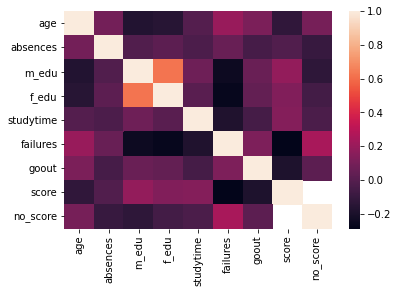

In [390]:
# для отслеживания построим тепловую карту
temp_corr = stud_for_model.corr()
sns.heatmap(temp_corr)

### Визуальный осмотр значений по age и failures показал, что значений очень близких к 1 или -1 нет

## 4. Подготовка финального датафрейма к моделированию¶


In [391]:
# заменим значения в столбцах на числовые, 
# аналогично обработке нулевых критериев
replacement_list = []
temp_list_of_columns = ['m_job', 'f_job']

for elem in temp_list_of_columns:
    a = stud_for_model[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 5:
        replacement_list.append([a[0],a[1],a[2],a[3], a[4]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: {a}")
replacement_list

[['at_home', 'health', 'other', 'services', 'teacher'],
 ['teacher', 'other', 'health', 'services', 'at_home']]

In [392]:
# сделаем в порядке, как в описании
# ['teacher', 'health', 'services', 'at_home', 'other']
replacement_list[0] = ['teacher', 'health', 'services', 'at_home', 'other']
replacement_list[1] = ['teacher', 'health', 'services', 'at_home', 'other']

In [393]:
# произведем замену
for i in range(len(temp_list_of_columns)):
    elem = temp_list_of_columns[i]
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][0], elem] = 1.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][1], elem] = 2.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][2], elem] = 3.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][3], elem] = 4.0
    stud_for_model.loc[stud_for_model[elem] == replacement_list[i][4], elem] = 5.0

In [394]:
# проверяем
replacement_list = []
for elem in temp_list_of_columns:
    a = stud_for_model[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 5:
        replacement_list.append([a[0],a[1],a[2],a[3], a[4]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: {a}")
replacement_list

[[4.0, 2.0, 5.0, 3.0, 1.0], [1.0, 5.0, 2.0, 3.0, 4.0]]

In [395]:
# переводим все типы рядов в float64
stud_for_model = stud_for_model.infer_objects()

In [396]:
# теперь выполним проверку
display(stud_for_model.head())
stud_for_model.info()

,age,absences,address,schoolsup,m_edu,f_edu,m_job,f_job,studytime,failures,goout,paid,higher,romantic,score,no_score
0,18.0,6.0,1.0,1.0,4.0,4.0,4.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,30.0,0.0
1,17.0,4.0,1.0,0.0,1.0,1.0,4.0,5.0,2.0,0.0,3.0,0.0,1.0,0.0,30.0,0.0
2,15.0,10.0,1.0,1.0,1.0,1.0,4.0,5.0,2.0,3.0,2.0,NaN,1.0,NaN,50.0,0.0
3,15.0,2.0,1.0,0.0,4.0,2.0,2.0,NaN,3.0,0.0,2.0,1.0,1.0,1.0,75.0,0.0
4,16.0,4.0,1.0,0.0,3.0,3.0,5.0,5.0,2.0,0.0,2.0,1.0,1.0,0.0,50.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        394 non-null    float64
 1   absences   383 non-null    float64
 2   address    378 non-null    float64
 3   schoolsup  386 non-null    float64
 4   m_edu      392 non-null    float64
 5   f_edu      371 non-null    float64
 6   m_job      376 non-null    float64
 7   f_job      359 non-null    float64
 8   studytime  388 non-null    float64
 9   failures   395 non-null    float64
 10  goout      387 non-null    float64
 11  paid       355 non-null    float64
 12  higher     375 non-null    float64
 13  romantic   364 non-null    float64
 14  score      352 non-null    float64
 15  no_score   389 non-null    float64
dtypes: float64(16)
memory usage: 49.5 KB


In [142]:
# создаем словарь соответствий значений описания и датафрейма 
# на случай если датафрейм будем использовать не мы 
help_read_dict = {'address':[['U', 1.0], ['R', 0.0]],
                  'schoolsup':[['yes', 1.0], ['no', 0.0]],
                  'famsup':[['yes', 1.0], ['no', 0.0]], 
                  'paid':[['yes', 1.0], ['no', 0.0]], 
                  'higher':[['yes', 1.0], ['no', 0.0]], 
                  'romantic':[['yes', 1.0], ['no', 0.0]],
                  'm_job':[['teacher', 1.0], ['health', 2.0], 
                           ['services', 3.0], ['at_home', 4.0],
                           ['other', 5.0]],
                  'f_job':[['teacher', 1.0], ['health', 2.0], 
                           ['services', 3.0], ['at_home', 4.0],
                           ['other', 5.0]]}

In [143]:
# в числовом датафрейме посмотрим корреляцию на score для формирования гипотез 
temp_corr = stud_for_model.corr()
pd.DataFrame(temp_corr.iloc[-2,:-2])

,score
age,-0.121579
absences,-0.014039
address,0.138230
schoolsup,-0.249796
m_edu,0.186477
f_edu,0.135268
m_job,-0.161517
f_job,-0.105052
studytime,0.142055
failures,-0.286925


## 5. Выводы¶

В результате EDA для анализа влияния условий жизни учащихся в возрасте 
от 15 до 22 лет на их успеваемость по математике, были получены следующие выводы:

1. В дата сете из 30 переменных меньше числовых (13) и больше номинативных (17).

2. В данных достаточно мало пустых значений и выбросов. Несколько раз встречались опечатки. Что говорит о том что данные достаточно чистые. Максимальный процент пропущенных значений 11.4%. Дупликатов в базе не было.

3. Удаления колонок по причине бесполезности также были минимальны.

* выбросы найдены:

    в столбце возраст (значение 22 удалено)
    
    в столбце score (значение 0.0 удалено, на его основе создан новый булевый критерий no_score)
    
4. Параметры корреляция параметра absences и age сильно скоррелированны, что говорит о высокой связи между возрастом и пропущенными занятиями. 

* гипотезы:

    отрицательная корреляция параметра age и score может говорить о том, что чем выше возраст, тем ниже score
    
    отрицательная корреляция параметра failures и score может говорить о том, что чем больше неудач по другим предметам тем ниже    score
    
    отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score
    
    положительная корреляция по парамметру m_edu говорит о том, что чем выше лучше образование матери тем выше score
    
    Итак, в нашем случае важные переменные, которые будут включены в модель по итогам всей аналитики: 'm_edu', 'f_edu', 'm_job', 'f_job', 'studytime', 'failures', 'goout', 'paid', 'higher', 'romantic'.
    
5. Результат работы включает полностью подготовленный числовой датасет stud_for_model и словарь соответствий между значениями датасета и описанием датасета help_read_dictперейти в начало   

6. Итоговая модель позволит отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.